In [1]:

import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/hj19/anaconda3/envs/spoof/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

In [3]:

data1 = pd.read_csv("./NEW-DATA-1.T15.txt", sep=' ')
data2 = pd.read_csv("./NEW-DATA-2.T15.txt", sep=' ')

In [4]:

target = '3:Temperature_Comedor_Sensor'
cols = [
    '3:Temperature_Comedor_Sensor',
 '4:Temperature_Habitacion_Sensor',
 '5:Weather_Temperature',
 '6:CO2_Comedor_Sensor',
 '7:CO2_Habitacion_Sensor',
 '8:Humedad_Comedor_Sensor',
 '9:Humedad_Habitacion_Sensor',
 '10:Lighting_Comedor_Sensor',
 '11:Lighting_Habitacion_Sensor',
 '12:Precipitacion',
 '13:Meteo_Exterior_Crepusculo',
 '14:Meteo_Exterior_Viento',
 '15:Meteo_Exterior_Sol_Oest',
 '16:Meteo_Exterior_Sol_Est',
 '20:Exterior_Entalpic_2',
 '21:Exterior_Entalpic_turbo',
 '22:Temperature_Exterior_Sensor']

In [5]:
data1

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,95436.800,758.8800,0,0,0,18.1150,48.3750,2.0,NaN,NaN
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,95436.800,762.0690,0,0,0,18.4147,47.8080,2.0,NaN,NaN
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,95398.600,766.2510,0,0,0,18.8533,47.4320,2.0,NaN,NaN
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,95360.300,766.0370,0,0,0,19.2907,47.0240,2.0,NaN,NaN
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,95354.900,762.7430,0,0,0,19.7400,45.4743,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.000,-3.4340,0,0,0,16.6180,49.2960,3.0,NaN,NaN
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,523.264,3.8520,0,0,0,16.4013,50.0373,3.0,NaN,NaN
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3347.460,26.8300,0,0,0,16.2607,50.0587,3.0,NaN,NaN
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,7110.660,66.9493,0,0,0,16.2367,49.8400,3.0,NaN,NaN


In [6]:
data2.head()

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,...,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0,NaN,NaN
1,18/04/2012,00:15,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,...,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0,NaN,NaN
2,18/04/2012,00:30,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,...,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0,NaN,NaN
3,18/04/2012,00:45,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,...,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0,NaN,NaN
4,18/04/2012,01:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,...,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0,NaN,NaN


In [7]:
data=pd.concat([data1,data2],axis=0)

In [8]:
np.max(data)

#                                  31/03/2012
Unnamed: 1                              23:45
1:Date                                 28.924
2:Time                                 28.548
3:Temperature_Comedor_Sensor               29
4:Temperature_Habitacion_Sensor       594.389
5:Weather_Temperature                 609.237
6:CO2_Comedor_Sensor                  60.9573
7:CO2_Habitacion_Sensor               62.5947
8:Humedad_Comedor_Sensor              111.797
9:Humedad_Habitacion_Sensor           162.965
10:Lighting_Comedor_Sensor                  1
11:Lighting_Habitacion_Sensor         625.003
12:Precipitacion                      6.32133
13:Meteo_Exterior_Crepusculo          95278.4
14:Meteo_Exterior_Viento              92367.5
15:Meteo_Exterior_Sol_Oest            95704.4
16:Meteo_Exterior_Sol_Est             1094.66
17:Meteo_Exterior_Sol_Sud                   0
18:Meteo_Exterior_Piranometro               0
19:Exterior_Entalpic_1                      0
20:Exterior_Entalpic_2            

In [9]:
train_size = 3200
val_size = 400
depth = 10
batch_size = 128
prediction_horizon = 1

In [24]:
from sklearn.preprocessing import MinMaxScaler
values = data[cols].values.reshape(-1,17)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [25]:
train,val, test,test1 = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:],scaled[train_size:,]
print(len(train),len(val), len(test),len(test1))

3200 400 537 937


In [26]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [27]:
look_back = 10
trainX, trainY = create_dataset_mul(train, look_back)
valX, valY = create_dataset_mul(val, look_back)
testX, testY = create_dataset_mul(test, look_back)
test1X, test1Y = create_dataset_mul(test1, look_back)

3190
390
527
927


In [10]:
X_train1 = np.zeros((len(data1), depth, len(cols)))
y_train1 = np.zeros((len(data1), 1))

In [11]:
for i, name in enumerate(cols):
    for j in range(depth):
        X_train1[:, j, i] = data1[name].shift(depth - j - 1).fillna(method="bfill")
y_train1 = data1[target].shift(-prediction_horizon).fillna(method='ffill')

In [12]:

X_train1 = X_train1[depth:-prediction_horizon]
y_train1 = y_train1[depth:-prediction_horizon]

In [13]:
X2 = np.zeros((len(data2), depth, len(cols)))
y2 = np.zeros((len(data2), 1))

In [14]:

for i, name in enumerate(cols):
    for j in range(depth):
        X2[:, j, i] = data2[name].shift(depth - j - 1).fillna(method="bfill")
y2 = data2[target].shift(-prediction_horizon).fillna(method='ffill')

In [15]:
X_train2 = X2[:train_size - len(data1)]
y_train2 = y2[:train_size - len(data1)]

X_val = X2[train_size - len(data1):train_size - len(data1) + val_size]
y_val = y2[train_size - len(data1):train_size - len(data1) + val_size]

X_test = X2[train_size - len(data1) + val_size:]
y_test = y2[train_size - len(data1) + val_size:]

In [16]:
X_train2 = X_train2[depth:]
y_train2 = y_train2[depth:]

In [17]:
X_train = np.concatenate([X_train1, X_train2], axis=0)
y_train = np.concatenate([y_train1, y_train2], axis=0)

In [53]:
X_train = np.concatenate([X_train1, X_train2, X_val], axis=0)
y_train = np.concatenate([y_train1, y_train2, y_val], axis=0)

In [54]:
X_train.shape, y_train.shape


((3579, 10, 17), (3579,))

from sklearn.preprocessing import MinMaxScaler
#values = data[cols].values.reshape(-1,17)
values = X_train.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
X_train = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

from sklearn.preprocessing import MinMaxScaler
#values = data[cols].values.reshape(-1,17)
values = y_train.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
y_train = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [19]:
x_train=np.concatenate([X_train1,X_train2,X_val,X_test],axis=0)

In [20]:
x_train.min(axis=0).shape

(10, 17)

In [55]:
X_train_min, y_train_min = X_train.min(axis=0), y_train.min(axis=0)
X_train_max, y_train_max = X_train.max(axis=0), y_train.max(axis=0)

In [56]:
X_train = (X_train - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_val = (X_val - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_test = (X_test - X_train_min)/(X_train_max - X_train_min + 1e-9)

y_train = (y_train - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_val = (y_val - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_test = (y_test - y_train_min)/(y_train_max - y_train_min + 1e-9)

In [57]:
X_train=X_train.astype('float32')
X_val=X_val.astype('float32')
X_test=X_test.astype('float32')
y_train=y_train.astype('float32')
y_val=y_val.astype('float32')
y_test=y_test.astype('float32')

In [58]:
X_train=np.array(X_train)
X_val=np.array(X_val)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [39]:
first_input = Input(shape=(10,17))


in0=LSTM(64,return_sequences=True,recurrent_dropout=0.2)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad=add([in0,in1],name='extractor')

#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(ad)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad1=add([in0,in1],name='extractor1')


#in0=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(ad1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([ad1,in1],name='extractor2')
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(ad1)
in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(1,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/sml_onestep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 10, 17)]     0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 10, 64)       20992       input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 10, 64)       20544       lstm_5[0][0]                     
__________________________________________________________________________________________________
conv1d_31 (Conv1D)              (None, 10, 64)       12352       conv1d_30[0][0]                  
____________________________________________________________________________________________

In [43]:
hist = model.fit([trainX],trainY, epochs = 100,validation_data=([valX],valY),batch_size=200, verbose = 1,callbacks=[cb])

Train on 3190 samples, validate on 390 samples
Epoch 1/100
3000/3190 [===========================>..] - ETA: 0s - loss: 9.3534e-04
Epoch 00001: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 68us/sample - loss: 9.5365e-04 - val_loss: 0.0011
Epoch 2/100
3000/3190 [===========================>..] - ETA: 0s - loss: 9.7030e-04
Epoch 00002: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 67us/sample - loss: 9.7062e-04 - val_loss: 0.0014
Epoch 3/100
3000/3190 [===========================>..] - ETA: 0s - loss: 0.0011   
Epoch 00003: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 67us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
2200/3190 [===================>..........] - ETA: 0s - loss: 0.0010    
Epoch 00004: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 66us/sample - loss: 9.9029e-04 - val_loss: 8.9701e-04
Epoch 5/100
2200/3190 

Epoch 36/100
2800/3190 [=========================>....] - ETA: 0s - loss: 6.7750e-04
Epoch 00036: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 69us/sample - loss: 6.7540e-04 - val_loss: 0.0013
Epoch 37/100
2200/3190 [===================>..........] - ETA: 0s - loss: 6.6557e-04
Epoch 00037: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 67us/sample - loss: 6.7119e-04 - val_loss: 0.0012
Epoch 38/100
3000/3190 [===========================>..] - ETA: 0s - loss: 7.0194e-04
Epoch 00038: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 67us/sample - loss: 7.0426e-04 - val_loss: 0.0015
Epoch 39/100
2200/3190 [===================>..........] - ETA: 0s - loss: 6.8063e-04
Epoch 00039: val_loss did not improve from 0.00087
3190/3190 [==============================] - 0s 66us/sample - loss: 6.7476e-04 - val_loss: 0.0018
Epoch 40/100
3000/3190 [===========================>..] - ETA: 0

Epoch 71/100
2800/3190 [=========================>....] - ETA: 0s - loss: 6.3681e-04
Epoch 00071: val_loss did not improve from 0.00085
3190/3190 [==============================] - 0s 67us/sample - loss: 6.3645e-04 - val_loss: 0.0012
Epoch 72/100
3000/3190 [===========================>..] - ETA: 0s - loss: 6.3819e-04
Epoch 00072: val_loss did not improve from 0.00085
3190/3190 [==============================] - 0s 67us/sample - loss: 6.3225e-04 - val_loss: 0.0012
Epoch 73/100
2200/3190 [===================>..........] - ETA: 0s - loss: 5.6597e-04
Epoch 00073: val_loss did not improve from 0.00085
3190/3190 [==============================] - 0s 67us/sample - loss: 5.5568e-04 - val_loss: 0.0016
Epoch 74/100
2200/3190 [===================>..........] - ETA: 0s - loss: 5.1806e-04
Epoch 00074: val_loss did not improve from 0.00085
3190/3190 [==============================] - 0s 67us/sample - loss: 5.2021e-04 - val_loss: 9.8637e-04
Epoch 75/100
2200/3190 [===================>..........] - ET

In [44]:
model.load_weights('saved_weights/sml_onestep.hdf5')

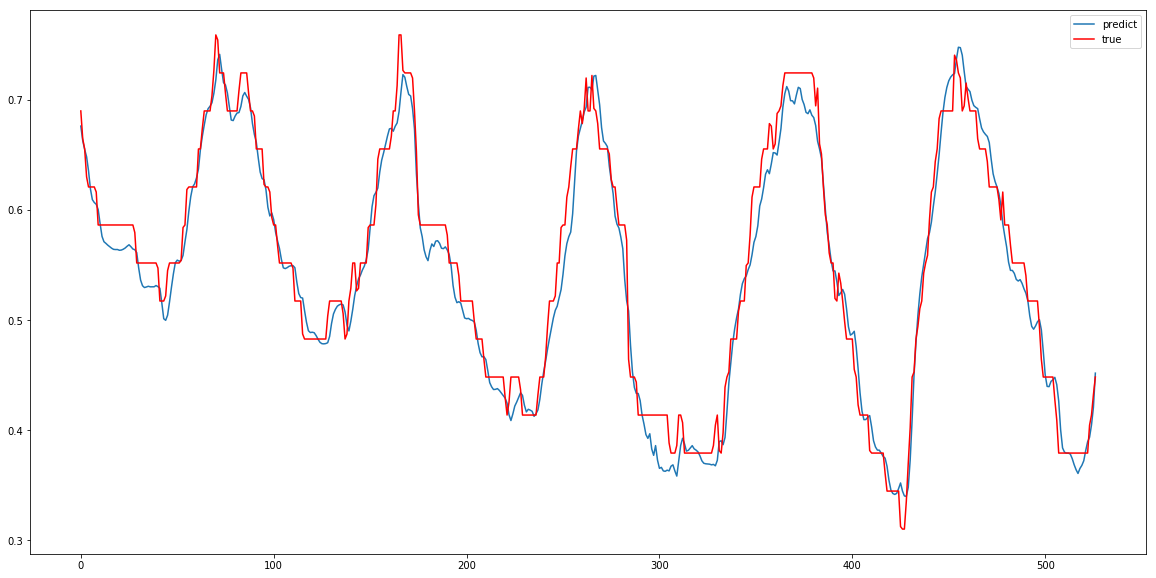

Test RMSE: 0.02085
Test MAE: 0.01652
Test MSE: 0.00043
Test RMSE: 1995.77861
Test MAE: 1581.14746


In [45]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY,'r', label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [24]:
yhat

array([[ 3.61793965e-01],
       [ 3.53632450e-01],
       [ 3.00883234e-01],
       [ 2.89585561e-01],
       [ 2.34079599e-01],
       [ 2.33975932e-01],
       [ 2.29914740e-01],
       [ 2.25309610e-01],
       [ 2.25806519e-01],
       [ 2.13829145e-01],
       [ 1.51654109e-01],
       [ 1.69511408e-01],
       [ 1.60010368e-01],
       [ 1.62486717e-01],
       [ 1.60009339e-01],
       [ 1.59727991e-01],
       [ 1.65815428e-01],
       [ 1.60182461e-01],
       [ 1.62279293e-01],
       [ 1.64501145e-01],
       [ 1.59164131e-01],
       [ 1.61528364e-01],
       [ 1.60829142e-01],
       [ 1.63646713e-01],
       [ 1.62767678e-01],
       [ 1.64848030e-01],
       [ 1.61034763e-01],
       [ 1.59538180e-01],
       [ 1.60699606e-01],
       [ 1.43040374e-01],
       [ 8.25499967e-02],
       [ 9.88197401e-02],
       [ 9.33100954e-02],
       [ 9.31537524e-02],
       [ 9.18117091e-02],
       [ 9.10992101e-02],
       [ 9.38270092e-02],
       [ 9.17817950e-02],
       [ 9.4